## Clustering the Gapminder Dataset

**Enter your name here:**

- First Name: Nursinem
- Name: Dere


In [1]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.pipeline import Pipeline


### Import the Gapminder Data of 1995

The dataset is a subset of the [gapminder dataset](https://www.gapminder.org/) from the year 1995.
- The data is provided as a csv-File `GM1995.csv` in the rar-archive.
- Place the data file in the same directory as the jupyter notebook.
- Answer the questions directly in the Jupyter notebook.

We read the data using `pandas.read_csv`.

In [2]:
df = pd.read_csv("GM1995.csv",index_col=0)
df.head()

,Country,Year,fertility,life,population,child_mortality,gdp,region,CountryCode
31,Afghanistan,1995,7.832,52.400,19789880.0,152.3,872.0,South Asia,AFG
81,Albania,1995,2.723,72.117,3141102.0,33.2,3941.0,Europe & Central Asia,ALB
131,Algeria,1995,3.449,67.893,28291591.0,42.6,9168.0,Middle East & North Africa,DZA
181,Angola,1995,7.019,42.073,12105105.0,224.8,2859.0,Sub-Saharan Africa,AGO
231,Antigua and Barbuda,1995,2.208,72.441,68642.0,19.7,17167.0,America,ATG


In [3]:
df.describe()

,Year,fertility,life,population,child_mortality,gdp
count,178.0,178.000000,178.000000,1.780000e+02,178.000000,178.000000
mean,1995.0,3.630568,65.461394,3.139590e+07,66.639888,12782.157303
std,0.0,1.848123,10.086426,1.194917e+08,66.376047,16820.173502
min,1995.0,1.039000,35.825000,6.864200e+04,4.800000,142.000000
25%,1995.0,1.886000,57.800750,1.964164e+06,15.225000,2190.250000
50%,1995.0,3.240000,68.182000,5.931078e+06,38.900000,6154.500000
75%,1995.0,5.040750,72.713000,1.946537e+07,107.500000,15096.500000
max,1995.0,7.832000,79.760000,1.213987e+09,279.500000,106425.000000


### (a) Extract the quantitative data and plot a histogram of these features

- Generate a dataframe `Xdata` containing the following features:
    - `fertility`
    - `life`
    - `population`
    - `child_mortality`
    - `gpd`
- Plot a histogram of these features.


['fertility' 'life' 'population' 'child_mortality' 'gdp']


<Figure size 432x288 with 0 Axes>

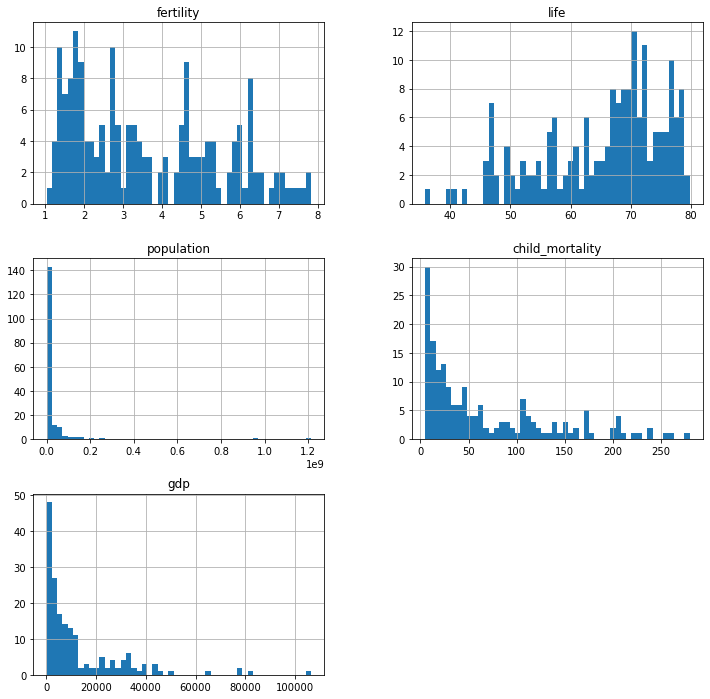

In [9]:
features=df.columns[2:7].values
print(features)

## Enter your code here
Xdata = df.loc[:,features]

plt.figure()
Xdata.hist(figsize=(12,12),bins=50)
plt.show()

### (b) Scale this dataset `Xdata` using a `PowerTransformer`
- Generate a pipeline consisting of the `MinMaxScaler()` and the `PowerTransformer()`
- Fit the pipeline to the dataset `Xdata`-

In [27]:
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
from sklearn.pipeline import make_pipeline

myPipeline=make_pipeline(MinMaxScaler(), PowerTransformer())
myPipeline.fit(Xdata)


Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('powertransformer', PowerTransformer())])

### (d) Use PCA to reduce the scaled dataset to two dimensions and display the data as a scatter plot.

- Use the feature `child_mortality` as marker color and `gpd` as size of the marker using `plt.scatter(..., c=df.child_mortality, s=df.gdp/100, cmap="jet")`

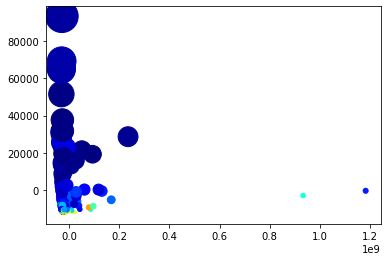

In [29]:
from sklearn.decomposition import PCA

#enter your code here
pca = PCA(n_components = 2)
Xdata2D = pca.fit_transform(Xdata)

plt.scatter(Xdata2D[:, 0], Xdata2D[:, 1], c=df.child_mortality, s=df.gdp/100, cmap="jet")

### (e) Use `TSNE` to reduce the scaled dataset to 2 dimensions and display the data as a scatter plot. 

- Use `TSNE` (t-distributed stochastic neighbour embedding) to reduce the dataset to 2 dimensions and display the transformed data as a scatter plot.
- Use the feature `child_mortality` as marker color and `gpd` as size of the marker using `plt.scatter(..., c=df.child_mortality, s=df.gdp/100, cmap="jet")`

*Hint: if you don't manage to transform the data to two dimensions, uncomment the lines of code in cell [10] and read directly the reduced dataset `GapMinderReduced.csv`.*


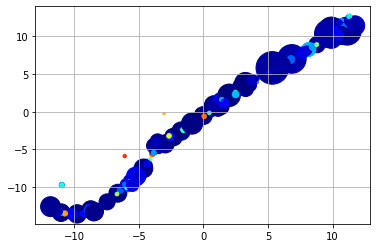

In [30]:
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(Xdata)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=df.child_mortality, s=df.gdp/100, cmap="jet")
plt.grid(True)
plt.show()



In [10]:
# This is CELL [10]
# if you don't manage to transform the data in two dimensions, continue with this cell and read directly the reduced dataset.

#dg=pd.read_csv('GapMinderReduced.csv',index_col=0)
#dg.head()

#X_reduced=dg.values
#plt.figure()
#plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=df.child_mortality, s=df.gdp/100, cmap="jet")
#plt.colorbar()


### (f) Cluster the TSNE-reduced data using `kMeans`.
- Plot the cluster inertia (`kmeans.ineria_`) as function of the number of clusters for `k=1` to `k=12`.
- What is the optimum number of clusters $k_{\mathrm{opt}}$ according to the elbow criterium?


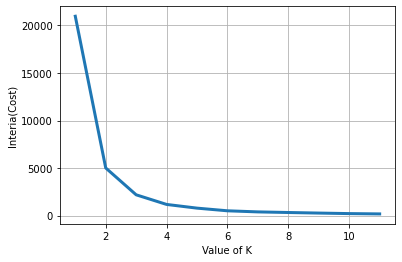

In [31]:
from sklearn.cluster import KMeans

inertiaList=[]
kmax=12

# enter your code here

# Calculating the cluster inertia for k-values between 1 and 12
for i in range(1, kmax):  
    kmeans = KMeans(n_clusters = i, max_iter = 500) 
    kmeans.fit(X_reduced)
    inertiaList.append(kmeans.inertia_)  

plt.plot(range(1, 12), inertiaList, linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Interia(Cost)")
plt.grid()

#6 can be chosen as the optimum number of clusters

## Upload this notebook as ipynb-File and as html-File (File  →  Download as  →  HTML) to the upload field of this question (2 files are allowed). 
